# Data Wrangling: Project 2

## Importing Required Libraries


In [1]:
# import required libraries
import numpy as np
import pandas as pd
import requests
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from timeit import default_timer as timer
%matplotlib inline

## Data Gathering

### Gathering First Dataset Using ```pandas.read_csv()```

In [2]:
# reading first dataset into a pandas dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# view first five(5) entries of the twitter_archive dataset
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Gathering second dataset programmatically from udacity's servers using the ```request``` library 

In [4]:
# assign url to a variable
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# generate request to the specified url
response = requests.get(url)

In [5]:
# write content of the response to a file named image_prediction
with open('image_predictions', mode='wb') as file:
    file.write(response.content)

In [6]:
# read image_prediction file into a dataframe
image_predictions = pd.read_csv('image_prediction', sep='\t')

In [7]:
# view top 5 entries in the image_predictions dataset
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Gathering Third Dataset from Provided JSON File

In [8]:
# create empty list called tweet_list
tweet_list = []
# set start time 
start = timer()
# read each line in the text file
with open('tweet_json.text', 'r') as file:
    # iterate and append each line of entry in the tweet_json file to tweet_list
    for line in file:
        data = json.loads(line)
        tweet_list.append(data)
#set end time
end = timer()

# convert created list into a data frame
tweet_json = pd.DataFrame(tweet_list, columns = ['id', 'retweet_count', 'favorite_count'])

# compute time taken for code to completely run
end-start

0.4002695000000003

In [9]:
# observe first 5 entries of created dataframe tweet_json
tweet_json.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Datasets

### Visual Assessment (Further Assessment Done Using  MS Excel)

#### Assessing ```twitter_archive``` dataset

In [10]:
# view twitter archive dataset for visuall assessment
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Description of twitter_archive dataset columns

1) __tweet_id__ -- represents the dedicated identifier for each tweet

2) __in_reply_to_status_id__ -- the integer representation of the tweet_id if the tweet is a reply 

3) __in_reply_to_user_id__ -- the integer representation of the author id of the original tweet if a tweet is a reply

4) __timestamp__ -- time when a tweet was created / made

5) __source__ -- an html forrmatted string representing the utility used to post a tweet.

6) __text__ -- actual UTF-8 text of the status update

7) __retweeted_status_id__ -- the integer representation of the id of the original tweet if a tweet is a retweet

8) __retweeted_status_user_id__ -- the integer representation of the author id of the original tweet if a tweet is a 
   retweet

9) __retweeted_status_timestamp__ -- time of retweet

10) __expanded_urls__ -- tweet URLs

11) __rating_numerator__ -- numerator of the rating of a dog which is almost always greater than 10.

12) __rating_denominator__ -- denominator of the rating of a dog which is 10

13) __name__ -- name of the dog

14) __doggo__ -- one out of the four dog stages

15) __floofer__ -- one out of the four dog stages

16) __pupper__ -- one out of the four dog stages

17) __puppo__ -- one out of the four dog stages

#### Assessing image_predictions dataset

In [11]:
# Visually assess image_predictions dataset
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [12]:
# create csv of image_predictions dataframe for further visual assessment in MS Excel
image_predictions.to_csv('image_predictions.csv')

#### Description of image_prediction dataset columns

1) __tweet_id__ -- represents the dedicated identifier for each tweet

2) __jpg_url__ -- dog's image URL

3) __img_num__ -- the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can
    have up to four images)

4) __p1__ -- algorithm's #1 prediction for the image in the tweet

5) __p1_conf__ -- how confident the algorithm is in its #1 prediction

6) __p1_dog__ -- whether or not the #1 prediction is a breed of dog

7) __p2__ -- algorithm's #2 prediction for the image in the tweet

7) __p2_conf__ -- how confident the algorithm is in its #2 prediction

8) __p2_dog__ -- whether or not the #2 prediction is a breed of dog

9) __p3__ -- algorithm's #3 prediction for the image in the tweet

10) __p3_conf__ -- how confident the algorithm is in its #3 prediction

11) __p3_dog__ -- whether or not the #3 prediction is a breed of dog

#### Assessing tweets_json dataset

In [13]:
# Visually assess tweet_json dataframe
tweet_json

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [14]:
# create csv of tweet_json dataframe for further visual assessment in MS Excel
tweet_json.to_csv('tweet_json.csv')

#### Description of tweet_json dataset columns

__id__ -- the unique identifier for each tweet

__retweet_count__ -- represents the number of times the original tweet was retweeted

__favorite_count__ -- represents the number of times the the original tweet was loved or liked

### Programmatic Assessment
Use a set of codes such as ``info()``, ```describe()``` and ```isnull()``` among others to assess the various datasets

In [15]:
# view general information about the twitter_archive dataframe
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
# view general information about the image_predictions dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
# view general information about the tweet_json dataframe
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [18]:
# view general statics of twitter_archive dataframe
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
# view general statics of image_predictions dataframe
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
# view general statics of tweet_json dataframe
tweet_json.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [21]:
# check for number of nulls in each column of twitter_archive dataframe
twitter_archive.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [22]:
# Check for duplicates in twitter_archive dataframe
twitter_archive.duplicated().sum()

0

In [23]:
# Check for duplicates in twitter_archive dataframe
image_predictions.duplicated().sum()

0

In [24]:
# Check for duplicates in tweet_josn dataframe
tweet_json.duplicated().sum()

0

In [25]:
# check datatypes of columns in twitter_archive dataframe
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [26]:
# check datatypes of columns in image_predictions dataframe
image_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [27]:
# check datatypes of columns in tweet_json dataframe
tweet_json.dtypes

id                int64
retweet_count     int64
favorite_count    int64
dtype: object

In [28]:
# check shape of twitter_archive dataframe
twitter_archive.shape

(2356, 17)

__twitter_archive__ has 2356 rows and 17 columns

In [29]:
# check shape of image_predictions dataframe
image_predictions.shape

(2075, 12)

__image_predictions__ hs 2075 rows and 12 columns

In [30]:
# check shape of tweet_json dataframe
tweet_json.shape

(2354, 3)

__tweet_json__ has 2354 rows and 3 columns

## Cleanliness Issues with Datasets

### Quality issues
1. Retweeted entries in dataset (ids in  retweeted_status_id, retweeted_status_user_id,   retweeted_status_timestamp) in __twitter_archive__ dataframe
    
2. Null values in ```in_reply_to_status_id```, ```in_reply_to_user_id```, ```retweeted_status_id```, ```retweeted_status_user_id```, ```retweeted_status_timestamp```, and ```expanded urls``` columns in twitter_archive datafreame.

3. Upper case ending a name (DayZ) in __twitter_archive__ dataframe

4. Null entries represented as 'None' in stages and name columns and other lower case text in names column (e.g. 'a', 'an', 'the') in __twitter_archive__ dataframe.

5. Same name represented differently in __twitter_archive__ dataframe (i.e. Frank, Frönq, Frankie, Gordon and Gòrdón)

6. Erroneous data types __in all three datasets__ : tweet_id all datasets and timestamp in ```twitter_archive``` dataset

7. Inconsistent column name of id column of __tweet_json__ dataset compared to __twitter_archive__ and __image_predictions__ datasets

8. Inconsistent value format in columns 'p1', 'p2' and 'p3' of __image_predictions__ dataframe

### Tidiness issues
1. Multiple and duplicated urls in expanded urls column in ```twitter_archive``` dataset

2. Comment, ratings and image urls in same column (text) in ```twitter_archive``` dataset

3. __doggo , floofer, pupper__ and __puppo__ columns are all categories of a dog's stage in ```twitter_archive``` dataset. These should be one column

4. The three datasets should be a single dataset

## Cleaning Datasets

### Making Copies of Original Datasets

In [31]:
# creat copies of each dataset
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_json_clean = tweet_json.copy()

### Resolving Quality Issues

#### Issue 1: tweets_main
Retweeted entries in dataset (ids in  retweeted_status_id, retweeted_status_user_id,   retweeted_status_timestamp)

##### Define

Drop all rows with retweeted_status_id not null

##### Code

In [32]:
# drop all instances of retweets with images
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isnull()]

##### Test

In [33]:
# Cross check to ensure change is effected
twitter_archive_clean.shape

(2175, 17)

Comment:

    Change is effect: Number of rows has reduced from 2356 to 2117

#### Issue 2
Null values in __in_reply_to_status_id__, __in_reply_to_user_id__, __retweeted_status_id__, __retweeted_status_user_id__, __retweeted_status_timestamp__, and __expanded_urls__ in twitter_archive datafreame.

##### Define
1. Drop columns ```in_reply_to_status_id```, ```in_reply_to_user_id```, ```retweeted_status_id```, ```retweeted_status_user_id```, ```retweeted_status_timestamp``` becuase all have over 50% entries missing.

2. drop 58 rows (less 5% of 2356) with null values in ```expanded_urls column```

##### Code

In [34]:
# drop columns with over 50% null entries from dataset by column index
twitter_archive_clean = twitter_archive_clean.drop(twitter_archive_clean.columns[[1,2,6,7,8]], axis=1)

In [35]:
# drop rows of expandand_urls column with null entries
twitter_archive_clean.dropna(inplace=True)

##### Test

In [36]:
# view dataframe's geneal information
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2117 non-null   int64 
 1   timestamp           2117 non-null   object
 2   source              2117 non-null   object
 3   text                2117 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2117 non-null   int64 
 6   rating_denominator  2117 non-null   int64 
 7   name                2117 non-null   object
 8   doggo               2117 non-null   object
 9   floofer             2117 non-null   object
 10  pupper              2117 non-null   object
 11  puppo               2117 non-null   object
dtypes: int64(3), object(9)
memory usage: 215.0+ KB


Comment:

    Change effected: Number of columns has reduced to 12 and all columns have no nulls.

#### Issues 3
Upper case ending a name (DayZ) in twitter_archive dataframe

##### Define
Replace DayZ with "Dayz"

##### Code

In [37]:
# replace instances of names identified and defined above
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace(to_replace=['DayZ'],value=['Dayz'])

##### Test

In [38]:
# verify above change (in code) is effected
twitter_archive_clean.query('name == "DayZ"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Issue 4
Null entries represented as __'None'__ in stages and name columns, and other lower case text in name column (e.g. 'a', 'an', 'the') in ```twitter_archive``` dataframe.

##### Define
Replace all __"None"__ in name column and all names begiining with lower case with with null values i.e. ```np.nan```

##### Code

In [39]:
#  iterate for instances of names begining with a small letter or is 'None' and replace with nulls
for name in twitter_archive_clean['name']:
    if str(name).islower() or str(name) == "None":
        twitter_archive_clean['name'].replace(name, np.nan, inplace=True)

##### Test

In [40]:
# Check for instances of name represented as "None"
twitter_archive_clean.query('name =="None"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [41]:
# check for few names starting with lower case 
twitter_archive_clean.query('name == "a" | name == "an" | name == "the"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Issue_5

Same name represented differently in __twitter_archive__ dataframe (i.e. Frank, Frönq, Frankie, Gordon and Gòrdón)

In [42]:
# view instances of the name Frank and Gordon
twitter_archive_clean.query('name == "Frönq" | name =="Frankie" | name == "Frank" | name=="Gòrdón" | name == "Gordon"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
688,787810552592695296,2016-10-17 00:20:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frank. He wears sunglasses and walks h...,https://twitter.com/dog_rates/status/787810552...,11,10,Frank,None,None,None,None
711,784517518371221505,2016-10-07 22:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He has yet to learn how to co...,https://twitter.com/dog_rates/status/784517518...,11,10,Frankie,None,None,None,None
1559,688547210804498433,2016-01-17 02:23:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frönq. He got caught stealing a waffle...,https://twitter.com/dog_rates/status/688547210...,9,10,Frönq,None,None,None,None
1580,687127927494963200,2016-01-13 04:23:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gordon. He's an asshole. 9/10 would still...,https://twitter.com/dog_rates/status/687127927...,9,10,Gordon,None,None,None,None
1968,673320132811366400,2015-12-06 01:56:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Frankie. He's wearing blush. 11/10 rea...,https://twitter.com/dog_rates/status/673320132...,11,10,Frankie,None,None,None,None
2217,668528771708952576,2015-11-22 20:37:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gòrdón. He enjoys his razberrita by po...,https://twitter.com/dog_rates/status/668528771...,12,10,Gòrdón,None,None,None,None
2265,667534815156183040,2015-11-20 02:47:56 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","This is Frank (pronounced ""Fronq""). Too many b...",https://twitter.com/dog_rates/status/667534815...,8,10,Frank,None,None,None,None


##### Define
1. Replace all instances of Frönq and Frankie with Frank
2. Replace all instances of Gòrdón with Gordon


##### Code

In [43]:
# replace instances of names identified and defined above with appropriate ones
twitter_archive_clean['name'] = twitter_archive_clean['name'].replace(to_replace=['Frönq', 'Frankie', 'Gòrdón'], value=['Frank', 'Frank','Gordon'])

##### Test

In [44]:
# verify above change is effected
twitter_archive_clean.query('name == "Frönq" | name =="Frankie" | name=="Gòrdón"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


Comment:

    Test code outputs a null which implies no instances of Frönq, Frankie and Gòrdón are present in the datatset

#### Issue 6

Erroneous data types in all three datasets: ```tweet_id``` all in datasets and ```timestamp``` in __twitter_archive__ dataset

##### Define

Change datatypes to appropriate ones: ```tweet_id``` in each dataset to string and ```timestamp``` to datetime

##### Code

In [45]:
# change columns datatypes to approriately
twitter_archive_clean = twitter_archive_clean.astype({'tweet_id':'str', 'timestamp':'datetime64[ns, UTC]'})
image_predictions_clean = image_predictions_clean.astype({'tweet_id':'str'})
tweet_json_clean = tweet_json_clean.astype({'id':'str'})

##### Test

In [46]:
# verify datatypes in twitter_archive dataset have been changed
twitter_archive_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                    int64
rating_denominator                  int64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
dtype: object

In [47]:
# verify datatypes in image_predictions dataset have been changed
image_predictions_clean.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [48]:
# verify datatypes in tweet_json dataset have been changed
tweet_json_clean.dtypes

id                object
retweet_count      int64
favorite_count     int64
dtype: object

#### Issue 7

Inconsistent column name of id column of __tweet_json__ dataset compared to __twitter_archive__ and __image_predictions__ datasets

##### Define
Rename column name "id" in __tweet_json__ to "tweet_id"

##### Code

In [49]:
# rename 'id' column in tweets_json dataframe to match that of the other two datasets
tweet_json_clean.rename(columns = {'id':'tweet_id'}, inplace=True)

##### Test

In [50]:
# verify column name has changed
tweet_json_clean.head(2)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819


#### Issue 8
Inconsistent value format in columns 'p1', 'p2' and 'p3' of __image_predictions__ dataframe

In [51]:
# view 30 samples of the p1, p2, and p3 columns
image_predictions_clean[['p1','p2', 'p3']].sample(30)

,p1,p2,p3
1017,Pembroke,Cardigan,Chihuahua
202,Pomeranian,Chihuahua,Pekinese
359,golden_retriever,Labrador_retriever,clumber
367,Chihuahua,pug,French_bulldog
572,schipperke,Labrador_retriever,kelpie
1693,English_setter,Border_collie,cocker_spaniel
1778,Weimaraner,Chesapeake_Bay_retriever,American_Staffordshire_terrier
2019,golden_retriever,Labrador_retriever,cocker_spaniel
410,Brabancon_griffon,Chihuahua,golden_retriever
1546,cocker_spaniel,Irish_setter,miniature_poodle


Comment:

    Some column entries are all lower case letters while others begin with an upper case letter

##### Define
Standardize values in ```p1```, ```p2```, ```p3``` columns of __image_predictions__ by changing it all to lower case

##### Code


In [52]:
image_predictions_clean['p1'] = image_predictions_clean['p1'].str.lower()
image_predictions_clean['p2'] = image_predictions_clean['p2'].str.lower()
image_predictions_clean['p3'] = image_predictions_clean['p3'].str.lower()
    

##### Test

In [53]:
# view 30 samples of the p1, p2, and p3 columns to check if change has been effected
image_predictions_clean[['p1','p2', 'p3']].sample(30)

,p1,p2,p3
424,ostrich,bearskin,swab
687,cheetah,arabian_camel,jaguar
1871,labrador_retriever,golden_retriever,chihuahua
1394,chow,golden_retriever,norfolk_terrier
2018,chihuahua,meerkat,clumber
722,damselfly,common_newt,whiptail
886,chihuahua,toyshop,weimaraner
1399,great_pyrenees,golden_retriever,labrador_retriever
322,labrador_retriever,chihuahua,golden_retriever
1184,labrador_retriever,golden_retriever,chesapeake_bay_retriever


Comments

    Column entries are all lower case strings after the change

### Resolving Tidyness Issues

#### Issue 1
Multiple and duplicated urls in expanded urls column in ```twiter_archive``` dataset

##### Define
Split the expanded_urls column and retain only the first column after the split

##### Code

In [54]:
# split ecpanded urls column based on the comma delimiter
twitter_archive_clean[['expanded_urls','a','b','c','d']] = twitter_archive_clean['expanded_urls'].str.split(',', expand = True)

In [55]:
# find column indexes
for i, j in enumerate(twitter_archive_clean.columns):
    print(i,j)

0 tweet_id
1 timestamp
2 source
3 text
4 expanded_urls
5 rating_numerator
6 rating_denominator
7 name
8 doggo
9 floofer
10 pupper
11 puppo
12 a
13 b
14 c
15 d


In [56]:
# drop unwanted resulting columns after the split using column indexes
twitter_archive_clean.drop(twitter_archive_clean.columns[[12,13,14,15]], axis=1, inplace=True)

##### Test

In [57]:
# view list of columns for reulting dataframe after the drop
list(twitter_archive_clean.columns)

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

#### Issue 2
Comment, ratings and image urls in same column (text) in __twitter_archive__ dataset

##### Define
1. Extract comment only from text column into a new column using ```regex``` and name the new column as "comment"

2. Afterwards drop text column from dataframe




##### Code

In [58]:
# extract only commnets from 'text' column using regex into a new column
twitter_archive_clean['comment'] =  twitter_archive_clean['text'].str.extract('([a-zA-Z\s\.\,\'\@\:\_\#\-\*\(\)\"\"\;\&\!]+)', expand=True)

In [59]:
# drop text column
twitter_archive_clean.drop('text', axis=1, inplace=True)

##### Test

In [60]:
# view all columns the current twitter_archive_clean dataset to see effectd change
list(twitter_archive_clean.columns)

['tweet_id',
 'timestamp',
 'source',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'comment']

In [61]:
# view general information about reulting dataframe after comment extraction
twitter_archive_clean.head()

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,comment
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,This is Tilly. She's just checking pup on you....
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,This is Darla. She commenced a snooze mid meal.
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,This is Franklin. He would like you to stop ca...


In [62]:
# create csv to visually assess dataset
twitter_archive_clean.to_csv('twitter_archive_clean.csv')

#### Issue 3
__doggo , floofer, pupper__ and __puppo__ columns are all categories of a dog's stage of life. These should be one column.

#### Define
1. confirm unique entries in each of __doggo__ , __floofer__, __pupper__ and __puppo__ columns
1. Concatenate the four columns into one column named __dog_stage__ introducing a space before each column entry
2. Use ```regex``` to extract the dog stages excluding 'None'.
3. drop __doggo__ , __floofer__, __pupper__ and __puppo__ columns

##### Code

In [63]:
# confirming unique entries in doggo column
twitter_archive_clean['doggo'].value_counts()

None     2033
doggo      84
Name: doggo, dtype: int64

In [64]:
# confirming unique entries in floofer column
twitter_archive_clean.floofer.value_counts()

None       2107
floofer      10
Name: floofer, dtype: int64

In [65]:
# confirming unique entries in pupper column
twitter_archive_clean['pupper'].value_counts()

None      1885
pupper     232
Name: pupper, dtype: int64

In [66]:
# confirming unique entries in puppo column
twitter_archive_clean['puppo'].value_counts()

None     2093
puppo      24
Name: puppo, dtype: int64

Comment:

    All four columns have just two entries: "None" and the dog stage which are all small letters. This is important to know
    as it would help in knwoing the right regex to use during the extractioin of the dog stages after merging the columns

In [67]:
# Concatenate the four columns into one column named dog_stage introducing a space before each column entry
twitter_archive_clean['dog_stage'] = " " + twitter_archive_clean['doggo'] + " " + twitter_archive_clean['floofer'] + " " + twitter_archive_clean['pupper'] + " " + twitter_archive_clean['puppo']

In [68]:
# Use regex to extract the dog stages excluding 'None'. NB: Dog stages are all small letters
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].str.extract('([\s][a-z]+)')

In [69]:
# view datset info to get column indexes to aid with dropping the appropriate columns
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   object             
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   expanded_urls       2117 non-null   object             
 4   rating_numerator    2117 non-null   int64              
 5   rating_denominator  2117 non-null   int64              
 6   name                1391 non-null   object             
 7   doggo               2117 non-null   object             
 8   floofer             2117 non-null   object             
 9   pupper              2117 non-null   object             
 10  puppo               2117 non-null   object             
 11  comment             2117 non-null   object             
 12  dog_stage           338 non-null  

In [70]:
# drop doggo , floofer, pupper and puppo columns
twitter_archive_clean.drop(twitter_archive_clean.columns[[7,8,9,10]], axis=1, inplace=True)

#### Test

In [71]:
# view general info of resulting dataset
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2117 non-null   object             
 1   timestamp           2117 non-null   datetime64[ns, UTC]
 2   source              2117 non-null   object             
 3   expanded_urls       2117 non-null   object             
 4   rating_numerator    2117 non-null   int64              
 5   rating_denominator  2117 non-null   int64              
 6   name                1391 non-null   object             
 7   comment             2117 non-null   object             
 8   dog_stage           338 non-null    object             
dtypes: datetime64[ns, UTC](1), int64(2), object(6)
memory usage: 165.4+ KB


Comment:
    
    The original four dog stage columns have been dropped after merging their information into one in the dog_stage column
    
    The null entries in name and dog_stage columns are not an issue therefore would not be dropped as these could be used
    in drawing insights

In [72]:
# check for unique dog_stages 
twitter_archive_clean['dog_stage'].value_counts()

 pupper     222
 doggo       84
 puppo       23
 floofer      9
Name: dog_stage, dtype: int64

In [73]:
# view a sample of the dataset to check all dog stages were captured
twitter_archive_clean[twitter_archive_clean['dog_stage'].notnull()].sample(15)

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,comment,dog_stage
948,752334515931054080,2016-07-11 02:51:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/752334515...,8,10,NaN,Here's a doggo trying to catch some fish.,doggo
1401,699434518667751424,2016-02-16 03:25:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/699434518...,12,10,NaN,I know this is a tad late but here's a wonderf...,pupper
108,871515927908634625,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,This is Napolean. He's a Raggedy East Nicaragu...,doggo
300,836753516572119041,2017-03-01 01:42:39+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/836753516...,12,10,Meera,This is Meera. She just heard about taxes and ...,doggo
200,854010172552949760,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/854010172...,11,10,NaN,"At first I thought this was a shy doggo, but i...",doggo
385,826848821049180160,2017-02-01 17:44:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/826848821...,13,10,Cupid,This is Cupid. He was found in the trash. Now ...,doggo
1142,727524757080539137,2016-05-03 15:46:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/727524757...,10,10,NaN,This pupper had to undergo emergency haircut s...,pupper
1624,684880619965411328,2016-01-06 23:33:58+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/684880619...,5,10,NaN,Here we have a basking dino pupper. Looks powe...,pupper
2002,672481316919734272,2015-12-03 18:23:34+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,Say hello to Jazz. She should be on the cover ...,pupper
1697,681231109724700672,2015-12-27 21:52:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/681231109...,11,10,NaN,I just love this pic.,pupper


#### Issue 4
The three datasets should be a single dataset

##### Define

Merge the ```twitter-archive_clean```, ```image_predictions_clean```, and ```tweets_json_clean``` into one master dataset.

##### Code

In [74]:
# Merge the twitter-archive_clean, image_predictions_clean, and tweets_json_clean into one master dataset
twitter_archive_master = pd.merge(twitter_archive_clean, image_predictions_clean, 
                                  on='tweet_id', how='inner').merge(tweet_json_clean, on='tweet_id', how='inner')

##### Test

In [75]:
# view master dataset
twitter_archive_master

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,comment,dog_stage,jpg_url,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,This is Phineas. He's a mystical boy. Only eve...,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,This is Tilly. She's just checking pup on you....,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891815181...,12,10,Archie,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891689557...,13,10,Darla,This is Darla. She commenced a snooze mid meal.,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,This is Franklin. He would like you to stop ca...,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,2015-11-16 00:24:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666049248...,5,10,NaN,Here we have a,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,...,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,41,111
1990,666044226329800704,2015-11-16 00:04:52+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666044226...,6,10,NaN,This is a purebred Piers Morgan. Loves to Netf...,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,...,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,147,311
1991,666033412701032449,2015-11-15 23:21:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666033412...,9,10,NaN,Here is a very happy pup. Big fan of well-main...,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,...,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128
1992,666029285002620928,2015-11-15 23:05:30+00:00,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/666029285...,7,10,NaN,This is a western brown Mitsubishi terrier. Up...,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,...,0.506826,True,miniature_pinscher,0.074192,True,rhodesian_ridgeback,0.072010,True,48,132


In [76]:
# view a lsit of all columns of the master dataset
list(twitter_archive_master.columns)

['tweet_id',
 'timestamp',
 'source',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'comment',
 'dog_stage',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'retweet_count',
 'favorite_count']

In [77]:
# view general info about the master dataset
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1994 non-null   object             
 1   timestamp           1994 non-null   datetime64[ns, UTC]
 2   source              1994 non-null   object             
 3   expanded_urls       1994 non-null   object             
 4   rating_numerator    1994 non-null   int64              
 5   rating_denominator  1994 non-null   int64              
 6   name                1350 non-null   object             
 7   comment             1994 non-null   object             
 8   dog_stage           306 non-null    object             
 9   jpg_url             1994 non-null   object             
 10  img_num             1994 non-null   int64              
 11  p1                  1994 non-null   object             
 12  p1_conf             1994 non-null 

Comment:
    
    All columns of the three datasets are present in the master dataset which indicates the merge was succesfull
    
    All columns have no nulls except for name and do_stage which are not are issue as insights coud be drawn from that

## Storing Data
Save the master dataset into a csv file called __twitter_archive_master__

In [78]:
# save clean dataset as a csv
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

### Analyzing and Visualizing Data
Generate insights and visualize data

#### Questions

1. What is the tweet distribution by day of week?
2. What is the tweet distribution by year?
3. Which dog had the highest rating?
4. How many dogs had their names not declared?
5. Which days had the highest and lowest retweet count?
6. On which day was a tweet liked or loved the most?
7. What is the favorite_counts distribution over days?
8. What is the most given dog name among the declared names in the dataset?
9. What is the percentage of dog stage that were not declared?


#### 1. What is the tweet distribution by day of week?

##### Creating a new column which contains the day of the week each tweet was made

In [79]:
# create new column showing day of week in which a tweet was made
twitter_archive_master['day_of_tweet'] = twitter_archive_master['timestamp'].dt.weekday
# set mapping variables
days = {0:'Monday' , 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
# changes day of week from numbers to respective day names
twitter_archive_master['day_of_tweet'] = twitter_archive_master['day_of_tweet'].map(days)

##### Creating a function to plot bar charts of preferred variables

In [80]:
# define a function to plot bar charts
def chart (df, column, x_label, y_label, chart_title):
    # choose chart style to use
    style.use('seaborn')
    # set chart size
    plt.figure(figsize=(6,6))
    # choose color to use for the bars in the chart
    color = sns.color_palette()[0]
    # define unique values of choosen column from dataset
    df_count = df[column].value_counts().values
    # Get index for all unique values of choosen column from dataset
    df_index = df[column].value_counts().index
    # plot a bar chart using seaborn library
    sns.countplot(data = df, x = column, color = color, order = df_index)
    # set data labels in chart
    for index, data in enumerate(df_count):
        plt.text(x=index, y = data+7, s= f'{data}',ha='center', fontsize=10)
    # set x_axis label
    plt.xlabel(x_label, fontsize=15)
    # set y_axis label
    plt.ylabel(y_label, fontsize=15)
    # set chart title
    plt.title(chart_title, fontsize=20)
    # set orientation of bars labels
    plt.xticks(rotation=75)
    # set y_axis labels not to be displayed
    plt.yticks([]);

##### Plot Tweets Count vrs Day of Week

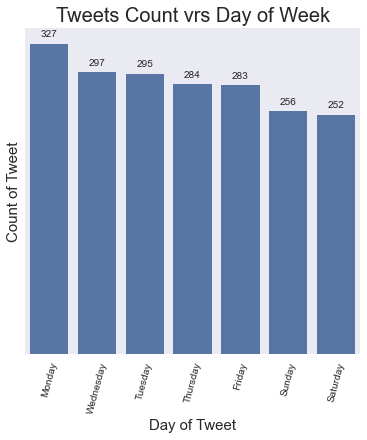

In [81]:
# call function to plot chart of tweet counts vrs day of week
chart(twitter_archive_master,'day_of_tweet', 'Day of Tweet', 'Count of Tweet',
      'Tweets Count vrs Day of Week')

Comment:

    Chart shows most tweets were made on Mondays whereas the least tweets were made on Saturdays

#### 2. What is the tweet distribution by year?

In [82]:
# create new column of years in which tweet was made
twitter_archive_master['year_of_tweet'] = twitter_archive_master['timestamp'].dt.year

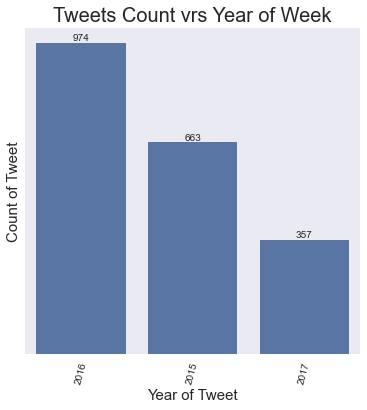

In [83]:
# call chart funtion to plot bar charts showing tweet counts for each unique year
chart(twitter_archive_master,'year_of_tweet', 'Year of Tweet', 'Count of Tweet',
      'Tweets Count vrs Year of Week')

Comment:

    2016 had the highest number of tweets followed by 2015 and then 2017   

##### Plotting Pie Chart Showing Tweets from Each Year Captured in the Dataset

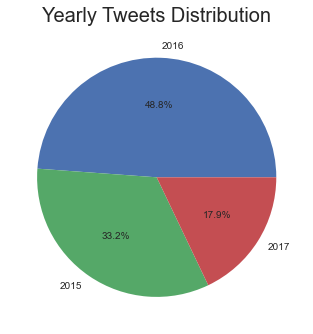

In [84]:
# Plot pie chart of tweet counts for each year to display the percentage contribution
yearly_tweets = twitter_archive_master['year_of_tweet'].value_counts()
plt.pie(yearly_tweets, labels = yearly_tweets.index, autopct='%1.1f%%')
plt.title('Yearly Tweets Distribution', fontsize=20);

Comment:

    Tweets in 2016 accounts for 48.8 percents of the entire dataset where that from 2015 and 2017 accounted for 33.2 % and
    17.9 % respectively

#### 3. Which dog had the highest rating?

In [85]:
# creat new column named rating
twitter_archive_master['rating'] = twitter_archive_master['rating_numerator'] / twitter_archive_master['rating_denominator']

In [86]:
# find maximum rating
twitter_archive_master['rating'].max()

177.6

In [87]:
# get name of dog with highest rating
twitter_archive_master.query("rating == 177.6")[['tweet_id', 'timestamp','name', 'day_of_tweet']]

,tweet_id,timestamp,name,day_of_tweet
726,749981277374128128,2016-07-04 15:00:45+00:00,Atticus,Monday


##### Getting url for dog with highest rating to be auto-loaded and displayed in a web browser

In [88]:
# import webbrowser library
import webbrowser as web
#open url of dog with highest rating
web.open(twitter_archive_master.query('rating == 177.6').expanded_urls.iloc[0])

True

##### Displaying image of dog with highest rating programmatically from my local machine
NB: To do same on your local machine, save the image displayed in the web browser when the code above was ran and change the ```path``` i.e. file path in the code below to that of your saved image

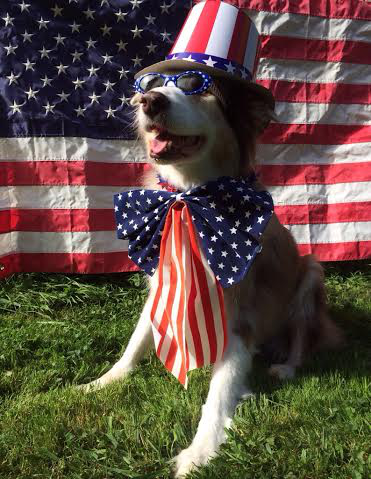

In [89]:
# import required libraries
from IPython.display import display
from PIL import Image

# display saved image of highest rated dog in notebook
path= "Atticus_Highest_Rated_Dog.jfif"
display(Image.open(path))

Comment:

    Atticus was the dog with the highest rating. His tweet was on Monday July 4, 2016 with tweet_id 749981277374128128

#### 4. How many dogs had their names not declared?

In [90]:
# compute undeclared dog names
twitter_archive_master['name'].isnull().sum()

644

In [91]:
# compute percentage of undeclared dog names rounded to one decimal place
round((twitter_archive_master['name'].isnull().sum() / twitter_archive_master['rating_numerator'].count()) * 100, 1)

32.3

Comment:

    644 dogs had their names not declared which corresponds to 32.2 % of the entire dogs

#### 5. Which days had the highest and lowest retweet count?

##### Computing day with highest tweets

In [92]:
# compute maximum retweet counts
twitter_archive_master['retweet_count'].max()

79515

In [93]:
# query dataset for entry of highest retweet
twitter_archive_master.query('retweet_count == 79515')[['timestamp', 'day_of_tweet']]

,timestamp,day_of_tweet
775,2016-06-18 18:26:18+00:00,Saturday


Comment:

    June 18, 2016 which was a Saturday was the day with the most tweets

##### Computting day with lowest number of tweets

In [94]:
# compute minimum retweet_count
twitter_archive_master['retweet_count'].min()

16

In [95]:
# query dataset for entry of lowest retweet
twitter_archive_master.query('retweet_count == 16')[['timestamp', 'day_of_tweet']]

,timestamp,day_of_tweet
1977,2015-11-16 03:55:04+00:00,Monday


Comment:

    November 16, 2015 which was a Monday was the day with the least recorded tweets

#### 6. On which day was a tweet liked or loved the most?

In [96]:
# copmute highest favorite count
twitter_archive_master['favorite_count'].max()

132810

In [97]:
# find date and day of week in which highest favourite count was recorded
twitter_archive_master.query('favorite_count == 132810')[['timestamp', 'day_of_tweet']]

,timestamp,day_of_tweet
309,2017-01-21 18:26:02+00:00,Saturday


Comment:

    Saturday, the 21st of January 2017 had the most recorded likes for a tweet

#### 7. What is the favorite_counts distribution over days?

In [98]:
# group the dataset by dates from the timestamp column and sum their respective count of likes
tweets_dates = twitter_archive_master.groupby(twitter_archive_master['timestamp'].dt.date).sum('favorite_count')

In [99]:
# create a dataframe from the grouped dataset above
tweets_dates = pd.DataFrame(tweets_dates)

##### Plotting line graph of the grouped dataset

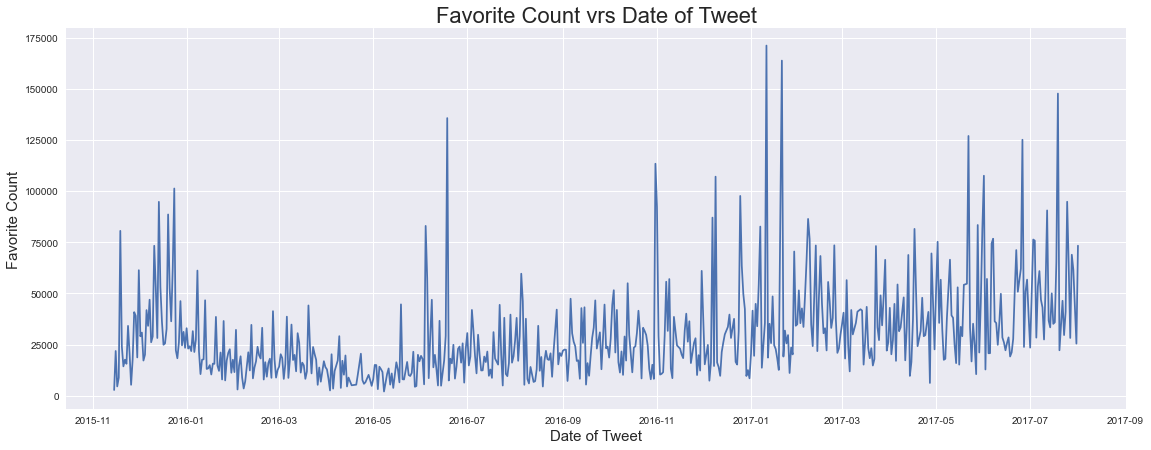

In [100]:
# set figure size
plt.figure(figsize=(19,7))
# plot line chart using seabor n library
sns.lineplot(x = tweets_dates.index, y = tweets_dates['favorite_count'])
# set chart title
plt.title('Favorite Count vrs Date of Tweet', fontsize=22)
# set x_axis label
plt.xlabel('Date of Tweet', fontsize=15)
# set y_axis label
plt.ylabel('Favorite Count', fontsize=15);

 Comment:
 
     The chart reveals that most of the tweet likes recorded were from September 2016 and beyond

#### 8. What is the most given dog name among the declared names in the dataset?

In [101]:
# finding most given dog name among the declared names
twitter_archive_master['name'].value_counts()

Charlie       11
Lucy          10
Oliver        10
Cooper        10
Tucker         9
              ..
Kota           1
Leela          1
Glenn          1
Shelby         1
Christoper     1
Name: name, Length: 910, dtype: int64

Comment:

    The most given dog name is Charlie closely followed by Lucy, Oliver and Cooper

#### 9. What is the percentage of dog stage that were not declared?

In [102]:
# Finding the percentage of dogs whose stage were not declared rounded to two decimal places
round((twitter_archive_master['dog_stage'].isnull().sum() / twitter_archive_master['tweet_id'].count())*100,2)

84.65

Comment:
     
     Approxiamtely 84.7 % of all dogs had their stage not declared. This could be that the owners are ignorant of the dog
     stages or they just decided not to state. If the later is true, then tweets wuthors could be encoureaged to state the
     stage of their dog but if the former is the case, then a strategy could be deployed to educate dog owners / tweet 
     uthors on the various stages of a dog's life.